# 第四章 NumPy基础：数据和矢量计算

NumPy(Numerical Python的简称)是高性能科学计算和数据分析的基础，它是本书所介绍的几乎多有高级工具的构建基础。NumPy本身并没有提供多么高级的数据分析功能，理解NumPy数组以及面向数组的计算将有助于你更加高效的使用诸如pandas之类的工具。虽然NumPy提供能计算基础，但你可能还是想将pandas作为数据分析工作的基础，尤其是对于结构化或者表格数据，因为它提供了能使大部分常见数据任务变得非常简洁的丰富高级接口。pandas还提供了一些NumPy所没有的更加特定领域的功能。

## NumPy的ndarray:一种多维数组对象

NumPy最重要的一个特点就是其N维数组对象，该对象式一个快速而灵活的大数据容器。你可以利用这种数组对整块数据执行一些数学运算。

### 创建ndarray

In [3]:
import numpy as np

In [4]:
# 生成数组
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [5]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [6]:
# 数组的结构
arr2.ndim
arr2.shape

(2, 4)

In [7]:
# 数组的类型
arr2.dtype

dtype('int32')

除np.array之外，还有一些函数也可以新建数组。比如，zeros和ones分别可以创建指定长度或形状的全0或1数组。empyt可以创建一个没有任何具体数值的数组。

In [8]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [11]:
np.empty((2, 3, 4))

array([[[4.26137296e+257, 9.77127699e-153, 7.07377193e+194,
         4.77093801e+180],
        [4.41575271e-085, 4.18240844e-013, 2.63435077e-085,
         5.33804097e+184],
        [7.50187034e+247, 7.20100785e+252, 7.69972395e+218,
         7.20370958e+159]],

       [[4.95261616e+223, 2.94443028e+156, 5.75680563e+252,
         4.70105217e+180],
        [5.98150400e-154, 5.72631240e+188, 7.80480571e+194,
         4.81438383e+199],
        [2.43812985e-152, 1.15112405e+161, 2.90699390e-014,
         4.16099477e+156]]])

认为np.empty会返回全0数组的想法是不安全的。很多情况下，它返回的都是一些为初始化的垃圾值。

In [13]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### ndarray的数据类型

In [15]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr1.dtype

dtype('float64')

In [19]:
# 转换数据类型
arr = np.array([1, 2, 3, 4])
arr.dtype

dtype('int32')

In [20]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

调用astype无论如何都会创建一个新的数组，浮点数只能近似表示分数值，复杂计算中只能在一定小数位之内有效。

### 数组和标量之间的运算

In [21]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
arr * arr

array([[ 1,  4,  9],
       [16, 25, 36]])

In [22]:
arr - arr

array([[0, 0, 0],
       [0, 0, 0]])

In [23]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [24]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

### 基本的索引和切片

In [25]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
arr[5]

5

In [27]:
arr[5:8]

array([5, 6, 7])

In [28]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

当你讲一个标量值赋值给一个切片时，该值会自动传播到整个选区，跟列表最重要的区别在于，数组切片时原始数组的视图。这意味着数组不会被复制，视图上的任何修改都会直接反应到源数组上。

In [29]:
arr_slice = arr[5:8]
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [30]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [31]:
# 需要得到复制的操作
arr[5:8].copy()

array([64, 64, 64])

In [33]:
# 多维数组提取
arr2d = np.array([[1,2,3], [4,5,6], [7,8,9]])
arr2d[0][2]

3

In [34]:
arr2d[0, 2]

3

### 切片索引

In [35]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [36]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [37]:
arr2d[1, :2]

array([4, 5])

In [38]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

### 布尔型索引

In [39]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Joe', 'Will', 'Will'])

In [41]:
data = np.random.randn(7, 4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Joe', 'Will', 'Will'], dtype='<U4')

In [42]:
data

array([[ 1.49642344, -0.45894389, -0.32185039,  1.0700357 ],
       [-0.96193676,  3.0589862 ,  0.26455828,  1.67363432],
       [-0.55516749, -0.31497622,  0.6051081 ,  0.83519811],
       [ 1.45109136, -2.63016362,  1.21367656,  1.16308722],
       [ 1.61405594,  0.95316621,  0.52555458, -0.28620058],
       [ 0.3542646 ,  0.88055732, -0.08246053, -1.1248081 ],
       [ 0.2960728 ,  0.89051476,  0.35543501,  1.15693976]])

In [43]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [44]:
# 布尔型数据可用于数组索引
data[names == 'Bob']

array([[ 1.49642344, -0.45894389, -0.32185039,  1.0700357 ],
       [ 1.45109136, -2.63016362,  1.21367656,  1.16308722]])

布尔型数组的长度必须跟索引的轴长度一致。此外，还可以将布尔型数组跟切片、证书混合使用。

In [49]:
data[names == 'Bob', 2:]

array([[-0.32185039,  1.0700357 ],
       [ 1.21367656,  1.16308722]])

In [50]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [52]:
data[~(names == 'Bob')]

array([[-0.96193676,  3.0589862 ,  0.26455828,  1.67363432],
       [-0.55516749, -0.31497622,  0.6051081 ,  0.83519811],
       [ 1.61405594,  0.95316621,  0.52555458, -0.28620058],
       [ 0.3542646 ,  0.88055732, -0.08246053, -1.1248081 ],
       [ 0.2960728 ,  0.89051476,  0.35543501,  1.15693976]])

In [54]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True, False,  True,  True])

In [55]:
data[mask]

array([[ 1.49642344, -0.45894389, -0.32185039,  1.0700357 ],
       [-0.55516749, -0.31497622,  0.6051081 ,  0.83519811],
       [ 1.45109136, -2.63016362,  1.21367656,  1.16308722],
       [ 0.3542646 ,  0.88055732, -0.08246053, -1.1248081 ],
       [ 0.2960728 ,  0.89051476,  0.35543501,  1.15693976]])

Python关键字and和or在布尔型数组中无效

In [56]:
data[data < 0]

array([-0.45894389, -0.32185039, -0.96193676, -0.55516749, -0.31497622,
       -2.63016362, -0.28620058, -0.08246053, -1.1248081 ])

In [57]:
data[names != 'Joe'] = 7
data

array([[ 7.        ,  7.        ,  7.        ,  7.        ],
       [-0.96193676,  3.0589862 ,  0.26455828,  1.67363432],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 1.61405594,  0.95316621,  0.52555458, -0.28620058],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ]])

### 花式索引

花式索引(Fancy indexing)是一个NumPy术语，它指的是利用整数数组进行索引。

In [58]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [59]:
# 特定顺序选取行子集
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [60]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [61]:
arr = np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [62]:
arr[[1,5,7,2],[0,3,1,2]]

array([ 4, 23, 29, 10])

In [63]:
arr[[1,5,7,2]][:,[0,3,1,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [64]:
arr[np.ix_([1,5,7,2],[0,3,1,2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### 数组转置和轴对称

In [66]:
arr = np.arange(15).reshape(3,5)
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [67]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [68]:
# 计算内积
arr = np.random.randn(6, 3)
np.dot(arr.T, arr)

array([[ 4.51108589,  1.81176299, -1.62286628],
       [ 1.81176299,  6.66257746,  1.68847836],
       [-1.62286628,  1.68847836,  3.8538921 ]])

In [69]:
arr = np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [70]:
arr.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [71]:
arr.swapaxes(1,2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## 调用函数：快速的元素级数组函数

通用函数（即ufunc）是一种对ndarray中的数据执行元素级元素的函数。你可以将其看做简单函数（接收一个或多个标量值，并产生一个或多个标量值）的矢量化包装器，许多ufunc都是简单的元素级变体，如sqrt,exp

In [72]:
arr = np.arange(10)
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [73]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [74]:
x = np.random.randn(8)
x

array([-1.76782628,  1.64126083, -0.37485857, -0.72675129, -0.64879742,
       -0.23525775, -0.36302145,  0.10259744])

In [75]:
y = np.random.randn(8)
y

array([ 0.18776415,  1.38153691, -0.71362872,  0.55428455, -2.52208052,
       -0.51608586,  0.69084754, -0.81025556])

In [76]:
# 获得最大值
np.maximum(x, y)

array([ 0.18776415,  1.64126083, -0.37485857,  0.55428455, -0.64879742,
       -0.23525775,  0.69084754,  0.10259744])

In [77]:
arr = np.random.randn(7) * 5
np.modf(arr)

(array([-0.62305057, -0.66822335,  0.34484399, -0.08333881, -0.45609775,
        -0.67003665, -0.11928025]), array([-6., -4.,  3., -7., -4., -2., -3.]))

## 利用数组进行数组处理

NumPy数组使你可以将许多中数据处理任务表述为简介的数组表达式。用数组表达式代替循环的做法，通常被称为矢量化。一般来说，矢量化数组运算要比等价的纯Python方式快上一两个数量级，尤其是各种数值计算。

In [78]:
ponits = np.arange(-5,5,0.01)
xs, ys = np.meshgrid(ponits, ponits)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [79]:
import matplotlib.pyplot as plt
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

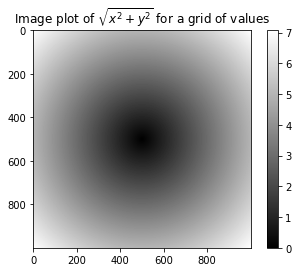

In [80]:
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

## 将条件逻辑表述为数组运算

In [81]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond  = np.array([True, False, True, True, False])

In [82]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [85]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [86]:
arr = np.random.randn(4,4)
arr

array([[-3.04636267, -0.2422088 ,  1.23100029,  0.34571985],
       [ 1.23664952,  1.26518502, -0.84152554, -1.6412531 ],
       [-0.71259698, -0.32716751, -0.56017626,  0.83905869],
       [-1.57210352,  0.32107395, -0.16899252,  0.95014321]])

In [87]:
np.where(arr > 0, 2, -2)

array([[-2, -2,  2,  2],
       [ 2,  2, -2, -2],
       [-2, -2, -2,  2],
       [-2,  2, -2,  2]])

In [88]:
# 值修改正值
np.where(arr > 0, 2, arr)

array([[-3.04636267, -0.2422088 ,  2.        ,  2.        ],
       [ 2.        ,  2.        , -0.84152554, -1.6412531 ],
       [-0.71259698, -0.32716751, -0.56017626,  2.        ],
       [-1.57210352,  2.        , -0.16899252,  2.        ]])

## 数学和统计方法

In [97]:
arr = np.random.randn(5, 4)
arr

array([[-1.40026998,  1.55661209,  0.55322307, -0.05787963],
       [-0.77439056,  0.97413275,  0.9990805 , -1.19697097],
       [ 2.11572781,  0.81654358,  0.82546913,  0.75770668],
       [ 1.87502086, -0.02530675,  0.17941675,  0.09687574],
       [-1.33733153,  1.52371278,  2.77169882, -0.2531009 ]])

In [98]:
arr.mean()

0.49999851200202194

In [99]:
np.mean(arr)

0.49999851200202194

In [100]:
arr.sum()

9.999970240040438

In [101]:
arr.mean(axis=1)

array([1.62921386e-01, 4.62931513e-04, 1.12886180e+00, 5.31501650e-01,
       6.76244792e-01])

In [102]:
arr.sum(0)

array([ 0.47875661,  4.84569445,  5.32888827, -0.65336908])

In [103]:
arr = np.array([[0,1,3], [3,4,5], [6,7,8]])
arr

array([[0, 1, 3],
       [3, 4, 5],
       [6, 7, 8]])

In [105]:
arr.cumsum(0)

array([[ 0,  1,  3],
       [ 3,  5,  8],
       [ 9, 12, 16]], dtype=int32)

In [106]:
arr.cumprod(1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

### 用于布尔型数组的方法

In [107]:
arr = np.random.randn(100)
arr

array([-0.08109839,  1.24550628,  2.36245128,  0.03285557,  1.56709612,
       -0.08188934,  0.83876469,  0.86350089,  0.309748  , -0.55910263,
       -0.60010377,  0.03484478,  0.31273888,  0.8146137 ,  1.43941355,
       -1.29499526,  1.65735018,  0.25153904,  0.07647361, -0.37595404,
       -0.48307598, -0.75407899,  0.85638014,  0.35954062,  1.33817642,
        1.12677117,  1.77527638,  0.20572774, -0.0468272 , -0.04342053,
       -1.38107542, -1.04364529,  1.67140244,  0.36311175,  0.03972993,
        0.2423779 ,  1.55498883,  0.73938492, -0.05577274,  0.61813689,
       -0.3296639 , -0.81416606,  0.26151331,  1.25382557,  0.68255385,
       -0.93121504, -0.22505626,  1.94473332,  0.69225988, -0.7012136 ,
       -0.65605543,  1.40163405,  0.66758829, -2.58640917, -0.73241419,
       -0.26104653, -0.22053927,  1.02813147, -0.64697967,  0.38306219,
       -0.09040791,  0.46020093,  0.51213367,  0.35964184,  0.11371414,
       -1.37904505, -0.48530765, -0.69890391,  0.07317219, -1.14

In [108]:
(arr > 0).sum()

53

In [109]:
bools = np.array([False, False, True, False])
bools.any()

True

In [110]:
bools.all()

False

### 排序

In [111]:
arr = np.random.randn(8)
arr

array([ 1.1777703 ,  0.77484339,  0.15673796,  0.03085605, -0.1134162 ,
        0.89974132, -0.02203771, -3.4653466 ])

In [113]:
arr.sort()
arr

array([-3.4653466 , -0.1134162 , -0.02203771,  0.03085605,  0.15673796,
        0.77484339,  0.89974132,  1.1777703 ])

### 唯一化以及其他的集合逻辑

In [114]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [115]:
values = np.array([6,0,0,3,2,5,6])
np.in1d(values, [2,3,6])

array([ True, False, False,  True,  True, False,  True])

## 用于数组的文件输入输出

### 将数组以二进制格式保存到磁盘

In [116]:
arr = np.arange(10)
np.save('some_array', arr)

In [117]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [119]:
# 将多个数字保存到一个压缩文件中
np.savez('array_archive.npz', a=arr, b=arr)

In [120]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 存取文本文件

In [1]:
import numpy as np

In [3]:
arr = np.loadtxt('array_ex.txt', delimiter=',')
arr

array([[ 0.580052,  0.18673 ,  1.040717,  1.134411],
       [ 0.194163, -0.636917, -0.938659,  0.124094],
       [-0.12641 ,  0.268607, -0.695724,  0.047428],
       [-1.484413,  0.004176, -0.744203,  0.005487],
       [ 2.302869,  0.200131,  1.670238, -1.88109 ],
       [-0.19323 ,  1.047233,  0.482803,  0.960334]])

### 线性代数

In [4]:
x = np.array([[1,2,3],[4,5,6]])
y = np.array([[6,23],[-1,7],[8,9]])

In [5]:
x

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
y

array([[ 6, 23],
       [-1,  7],
       [ 8,  9]])

In [7]:
x.dot(y)

array([[ 28,  64],
       [ 67, 181]])

### 随机数生成

In [8]:
# 正太分布随机数
samples = np.random.normal(size=(4,4))
samples

array([[-0.07561537, -0.21273386, -0.24969054, -0.13521638],
       [-1.01734306, -0.71739463,  0.30155102,  0.42002365],
       [ 0.36056577,  0.66271078,  0.23002252, -0.69405071],
       [ 0.16640498,  0.93766841, -0.73614033, -0.05804398]])

In [5]:
# 快速生成
from random import normalvariate
N = 1000000

In [4]:
# random模块随机漫步
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [6]:
# 数组运算实现
nsteps = 1000 
draws = np.random.randint(0,2,size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
walk.min()

-42

In [7]:
walk.max()

15